# Reversed of Melb House prize

## Examine the number of households in each suburbs based on Property Tpye


In [50]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
# load data
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Discover the number of property in each type and calculate the median number as threshold to
## divide the suburbs

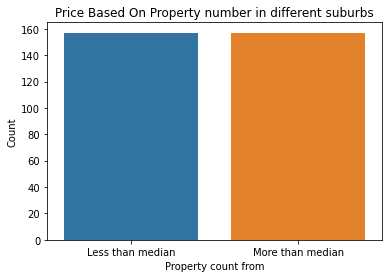

In [56]:
# Property number based on suburb (the number is the same based on the property type)
df2 = df.groupby('Suburb')['Propertycount'].unique()
median_procount = df2.median()
less_property = df2[df2<median_procount].shape[0]
more_property = df2[df2>median_procount].shape[0]
procount = pd.DataFrame({'Property':['Less than median','More than median'],'Count':[less_property,more_property]})
sns.barplot(y=procount["Count"],x=procount["Property"])
plt.title('Price Based On Property number in different suburbs')
plt.xlabel('Property count from')
plt.ylabel('Count')
plt.show()

In [52]:
median_procount = df2.median()
median_procount

3964.0

## Use top 5 suburbs to discover the suburb impact of the price

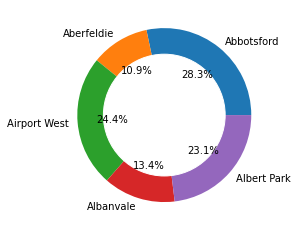

In [31]:
# top 5 suburbs
TopSub = df.groupby('Suburb')['Propertycount'].unique().head(5).to_frame().reset_index()
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(TopSub["Propertycount"], labels=TopSub["Suburb"],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [32]:
# different property price regarding the top 5 suburbs
TopSub

,Suburb,Propertycount
0,Abbotsford,[4019.0]
1,Aberfeldie,[1543.0]
2,Airport West,[3464.0]
3,Albanvale,[1899.0]
4,Albert Park,[3280.0]


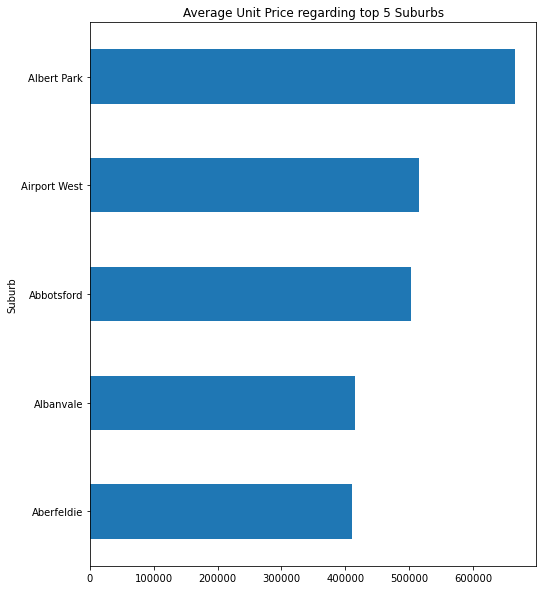

In [40]:
TopSubName = TopSub['Suburb'].tolist()
TopSubDf = df[df['Suburb'].isin(TopSubName)]


## Different type of property median prize based on the top 5 suburb

C:\Users\87636\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\87636\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


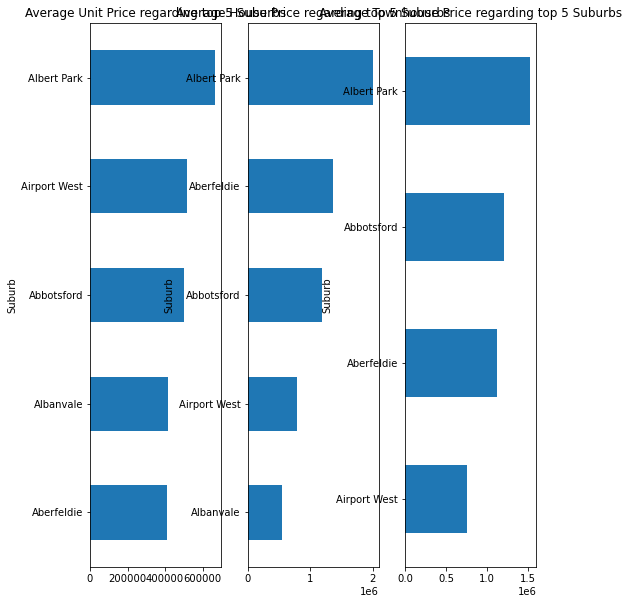

In [62]:
fig, ax = plt.subplots(figsize=(8, 10))
# unit price in top 5 suburbs
plt.subplot(1,3,1)
TopSubDf[TopSubDf['Type']=='u'].groupby('Suburb').Price.agg('median').sort_values().plot.barh()
plt.title('Average Unit Price regarding top 5 Suburbs')
# house price in top 5 suburbs
plt.subplot(1,3,2)
TopSubDf[TopSubDf['Type']=='h'].groupby('Suburb').Price.agg('median').sort_values().plot.barh()
plt.title('Average House Price regarding top 5 Suburbs')
# town house price in top 5 suburbs
plt.subplot(1,3,3)
TopSubDf[TopSubDf['Type']=='t'].groupby('Suburb').Price.agg('median').sort_values().plot.barh()
plt.title('Average Townhouse Price regarding top 5 Suburbs')
plt.show()

## Corr among the numeric cols

In [61]:
df.corr(method ='pearson')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


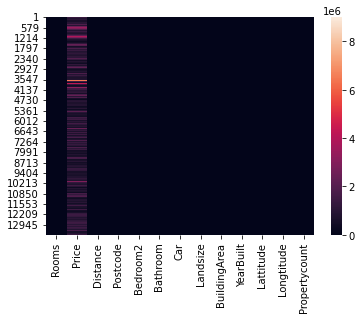

In [49]:
# cluster heatmap of all the numeric cols
# choose only numeric cols
import numpy as np
numdf = df.select_dtypes(include=np.number)
numdf = numdf.dropna()
sns.heatmap(numdf)
plt.show()